<a href="https://colab.research.google.com/github/Matrix-69/GenAI/blob/main/GenAI_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 76.9 MB/s eta 0:00:00
Loading pre-trained Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Performing dimensionality reduction...


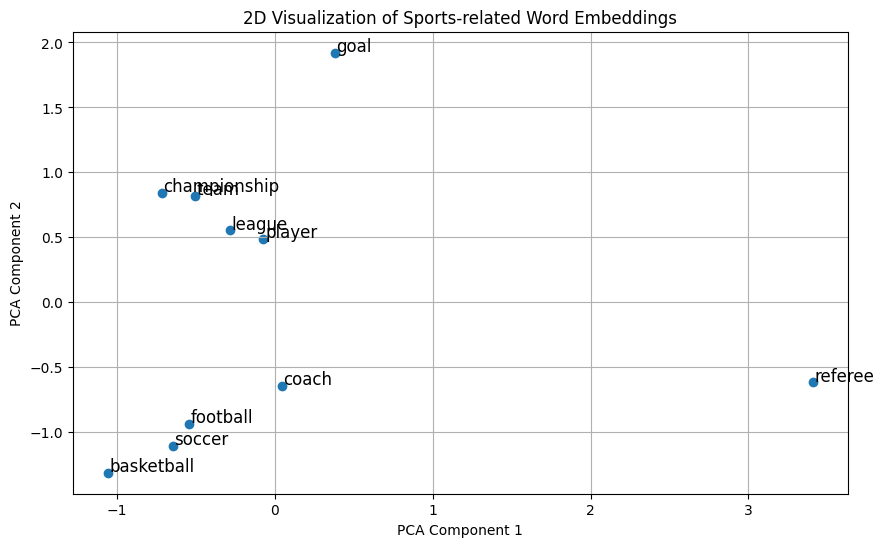


Most similar words to 'soccer':
Soccer: 0.7622618675231934
football: 0.7313547730445862
basketball: 0.6810985207557678
volleyball: 0.6647275686264038
softball: 0.6443415284156799


In [4]:
!pip install gensim
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model
print("Loading pre-trained Word2Vec model...")
model = api.load('word2vec-google-news-300')

# List of 10 sports-related words
sports_words = ['soccer', 'football', 'basketball', 'player', 'team',
  'coach', 'referee', 'goal', 'championship', 'league']

# Get the word vectors for the selected words
word_vectors = [model[word] for word in sports_words]

# Perform dimensionality reduction using PCA (or t-SNE for more detailed separation)
print("Performing dimensionality reduction...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Visualize the word embeddings in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate words on the 2D plot
for i, word in enumerate(sports_words):
  plt.text(pca_result[i, 0] + 0.01, pca_result[i, 1] + 0.01, word, fontsize=12)

plt.title("2D Visualization of Sports-related Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Function to find 5 semantically similar words for a given word
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.most_similar(input_word, topn=top_n)
        print(f"\nMost similar words to '{input_word}':")
        for word, similarity in similar_words:
            print(f"{word}: {similarity}")
    except KeyError:
        print(f"Word '{input_word}' not found in the model vocabulary.")

# Test the function with a sample word from the sports domain
input_word = 'soccer'
find_similar_words(input_word)